# SciPy Utilities

Installation:

    conda install scipy

Overview of topics covered in this notebook:
- Statistics / Probability distributions
- IO
- Special functions
- Linear Algebra
- Discrete Fourier Transform
- Optimization

https://www.guru99.com/scipy-tutorial.html


## 1. Statistics / Probability Distributions

Load distributions:

    from scipy.stats import binom,norm,cauchy

Instantiate a distribution with its parameters:
    
    dist = binom(n, b)
    dist = norm(m, s)
    dist = cauchy(z, g)
    ...
    
Get data:

    dist.rvs(N) # N random variables of the distribution
    dist.pmf(x) # Probability Mass Function at values x for discrete distributions
    dist.pdf(x) # Probability Density Function at values x for continuous distributions
    dist.cdf(x) # Cumulative Distribution Function at values x for any distribution

Note: `dist.cdf(v)` = $P (x < v)$; $P(x < \infty) = 1$

### Example plots

In [1]:
import numpy as np
from scipy.stats import binom, norm, cauchy
from matplotlib import pyplot as plt
%matplotlib inline

#### Binomial

In [2]:
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 200)

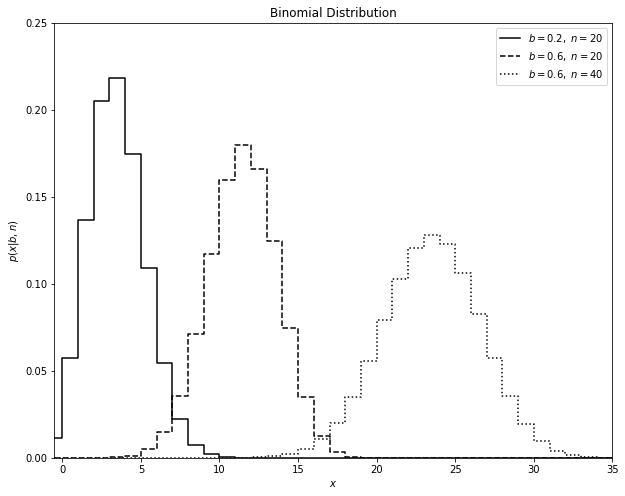

In [3]:
# Probability Mass Function
fig, ax = plt.subplots(figsize=(10, 8))
for (n, b, ls) in zip(n_values, b_values, linestyles):
    dist = binom(n, b)
    # NOTE: if we have a discrete distribution, use plt.step(), not plt.plot()
    plt.step(x, dist.pmf(x), color='black', linestyle=ls, label='$b={},\ n={}$'.format(b, n))

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel('$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

In [4]:
# Five random numbers in the Binomial distirbution B(40,0.6)
dist = binom(40, 0.6)
dist.rvs(5)

array([23, 25, 24, 20, 25])

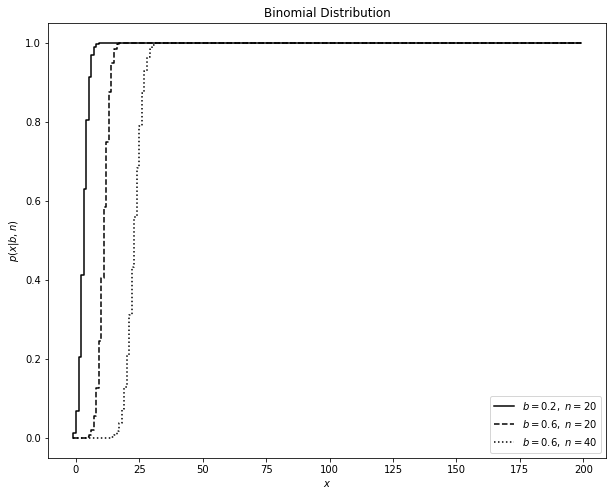

In [5]:
# Cumulative Distrubution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (n, b, ls) in zip(n_values, b_values, linestyles):
    dist = binom(n, b)
    plt.step(x, dist.cdf(x), color='black', linestyle=ls, label='$b={},\ n={}$'.format(b, n))

plt.xlabel('$x$')
plt.ylabel('$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

#### Normal

In [6]:
m_values = [0, 0, 1]
s_values = [0.5, 1, 1]
linestyles = ['-', '--', ':']
x = np.arange(-5, 5, 0.1)

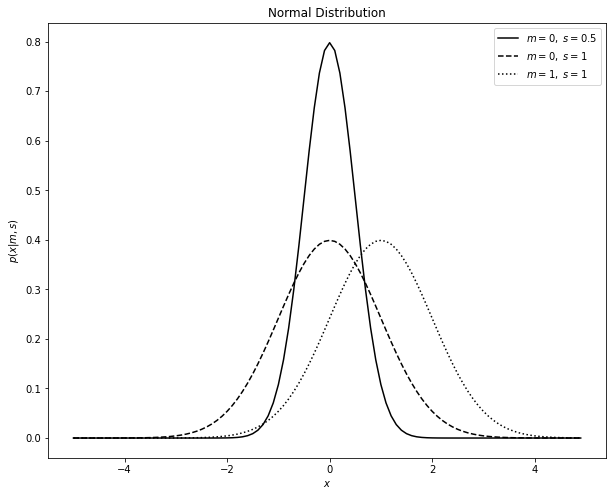

In [7]:
# Probability Distribution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (m, s, ls) in zip(m_values, s_values, linestyles):
    dist = norm(m, s)
    plt.plot(x, dist.pdf(x), color='black', linestyle=ls, label='$m={},\ s={}$'.format(m, s))

plt.xlabel('$x$')
plt.ylabel('$p(x|m, s)$')
plt.title('Normal Distribution')

plt.legend()
plt.show()

In [8]:
# Five random numbers in the Normal distirbution N(1,1)
dist = norm(1, 1)
dist.rvs(5)

array([ 0.65543468,  1.34929451,  1.98131801, -0.15959217,  0.23690419])

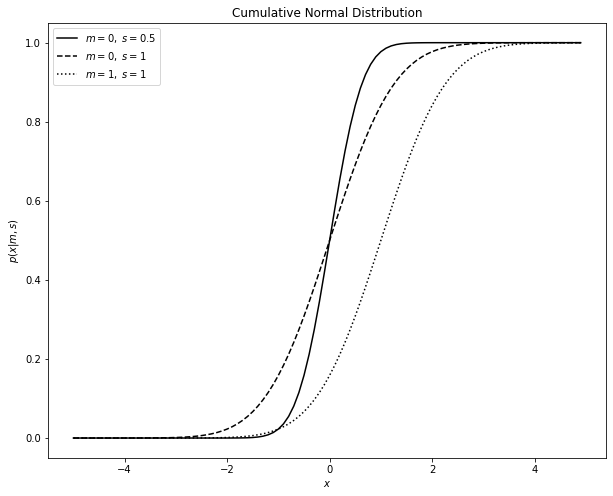

In [9]:
# Cumulative Distrubution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (m, s, ls) in zip(m_values, s_values, linestyles):
    dist = norm(m, s)
    plt.plot(x, dist.cdf(x), color='black', linestyle=ls, label='$m={},\ s={}$'.format(m, s))

plt.xlabel('$x$')
plt.ylabel('$p(x|m, s)$')
plt.title('Cumulative Normal Distribution')

plt.legend()
plt.show()

#### Cauchy

In [10]:
z_values = [0, 0, 1]
g_values = [0.5, 1, 1]
linestyles = ['-', '--', ':']
x = np.arange(-5, 5, 0.1)

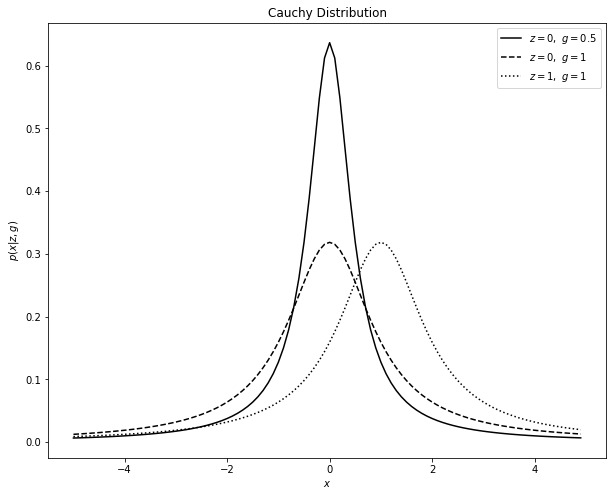

In [11]:
# Probability Distribution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (z, g, ls) in zip(m_values, s_values, linestyles):
    dist = cauchy(loc=z,scale=g)
    plt.plot(x, dist.pdf(x), color='black', linestyle=ls, label='$z={},\ g={}$'.format(z, g))

plt.xlabel('$x$')
plt.ylabel('$p(x|z, g)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()

In [12]:
# Five random numbers in the Cauchy distirbution C(1,1)
dist = cauchy(1, 1)
dist.rvs(5)

array([  8.87349581, -10.22004882,   0.28029229,  -0.07109176,
         2.23219543])

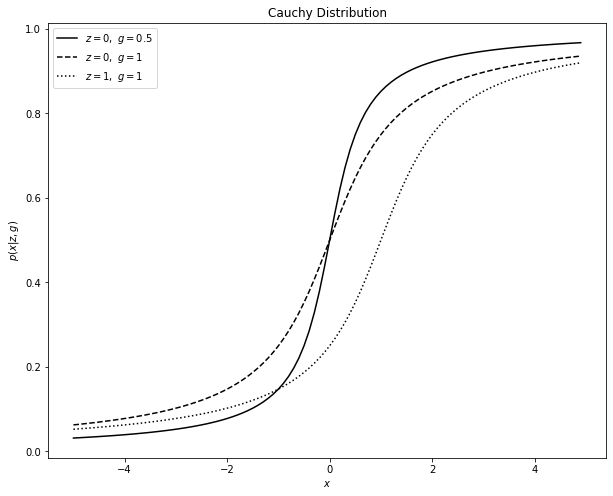

In [13]:
# Cumulative Distrubution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (z, g, ls) in zip(m_values, s_values, linestyles):
    dist = cauchy(loc=z,scale=g)
    plt.plot(x, dist.cdf(x), color='black', linestyle=ls, label='$z={},\ g={}$'.format(z, g))

plt.xlabel('$x$')
plt.ylabel('$p(x|z, g)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()